## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9755614	total: 47.5ms	remaining: 47.4s
1:	learn: 0.9557785	total: 48.5ms	remaining: 24.2s
2:	learn: 0.9358659	total: 49.5ms	remaining: 16.5s
3:	learn: 0.9189687	total: 50.6ms	remaining: 12.6s
4:	learn: 0.8980944	total: 51.6ms	remaining: 10.3s
5:	learn: 0.8836369	total: 52.7ms	remaining: 8.72s
6:	learn: 0.8655406	total: 53.7ms	remaining: 7.61s
7:	learn: 0.8489420	total: 54.7ms	remaining: 6.78s
8:	learn: 0.8323514	total: 55.7ms	remaining: 6.13s
9:	learn: 0.8161990	total: 56.8ms	remaining: 5.62s
10:	learn: 0.8006319	total: 57.8ms	remaining: 5.19s
11:	learn: 0.7844541	total: 58.8ms	remaining: 4.84s
12:	learn: 0.7683061	total: 59.9ms	remaining: 4.54s
13:	learn: 0.7525097	total: 60.9ms	remaining: 4.29s
14:	learn: 0.7403869	total: 62ms	remaining: 4.07s
15:	learn: 0.7259850	total: 63ms	remaining: 3.87s
16:	learn: 0.7134992	total: 64.1ms	remaining: 3.7s
17:	learn: 0.6999679	total: 65.1ms	remaining: 3.55s
18:	learn: 0.6879390	total: 66ms	remaining: 3.41s


95:	learn: 0.3130133	total: 144ms	remaining: 1.35s
96:	learn: 0.3117096	total: 145ms	remaining: 1.35s
97:	learn: 0.3106511	total: 146ms	remaining: 1.34s
98:	learn: 0.3093076	total: 147ms	remaining: 1.34s
99:	learn: 0.3078453	total: 148ms	remaining: 1.33s
100:	learn: 0.3070225	total: 149ms	remaining: 1.33s
101:	learn: 0.3051694	total: 150ms	remaining: 1.32s
102:	learn: 0.3037966	total: 151ms	remaining: 1.32s
103:	learn: 0.3026450	total: 153ms	remaining: 1.31s
104:	learn: 0.3008832	total: 154ms	remaining: 1.31s
105:	learn: 0.2992000	total: 155ms	remaining: 1.3s
106:	learn: 0.2975004	total: 156ms	remaining: 1.3s
107:	learn: 0.2964009	total: 157ms	remaining: 1.29s
108:	learn: 0.2952250	total: 158ms	remaining: 1.29s
109:	learn: 0.2944371	total: 159ms	remaining: 1.28s
110:	learn: 0.2936600	total: 160ms	remaining: 1.28s
111:	learn: 0.2924746	total: 161ms	remaining: 1.27s
112:	learn: 0.2914875	total: 162ms	remaining: 1.27s
113:	learn: 0.2899339	total: 163ms	remaining: 1.26s
114:	learn: 0.28873

229:	learn: 0.2092131	total: 281ms	remaining: 940ms
230:	learn: 0.2086799	total: 282ms	remaining: 939ms
231:	learn: 0.2082661	total: 286ms	remaining: 945ms
232:	learn: 0.2079634	total: 287ms	remaining: 944ms
233:	learn: 0.2073600	total: 288ms	remaining: 943ms
234:	learn: 0.2070652	total: 290ms	remaining: 943ms
235:	learn: 0.2063042	total: 291ms	remaining: 941ms
236:	learn: 0.2057166	total: 292ms	remaining: 939ms
237:	learn: 0.2052500	total: 293ms	remaining: 937ms
238:	learn: 0.2046577	total: 294ms	remaining: 935ms
239:	learn: 0.2041995	total: 295ms	remaining: 933ms
240:	learn: 0.2035882	total: 296ms	remaining: 931ms
241:	learn: 0.2031564	total: 297ms	remaining: 929ms
242:	learn: 0.2025866	total: 298ms	remaining: 928ms
243:	learn: 0.2019879	total: 299ms	remaining: 926ms
244:	learn: 0.2017243	total: 300ms	remaining: 924ms
245:	learn: 0.2014735	total: 301ms	remaining: 922ms
246:	learn: 0.2008132	total: 302ms	remaining: 920ms
247:	learn: 0.2004009	total: 303ms	remaining: 918ms
248:	learn: 

356:	learn: 0.1560670	total: 413ms	remaining: 745ms
357:	learn: 0.1558975	total: 415ms	remaining: 744ms
358:	learn: 0.1554619	total: 416ms	remaining: 742ms
359:	learn: 0.1552333	total: 417ms	remaining: 741ms
360:	learn: 0.1548505	total: 418ms	remaining: 739ms
361:	learn: 0.1545244	total: 419ms	remaining: 738ms
362:	learn: 0.1542115	total: 420ms	remaining: 736ms
363:	learn: 0.1539741	total: 421ms	remaining: 735ms
364:	learn: 0.1537810	total: 422ms	remaining: 734ms
365:	learn: 0.1535995	total: 423ms	remaining: 732ms
366:	learn: 0.1532515	total: 424ms	remaining: 731ms
367:	learn: 0.1530495	total: 425ms	remaining: 730ms
368:	learn: 0.1528428	total: 426ms	remaining: 728ms
369:	learn: 0.1524930	total: 427ms	remaining: 727ms
370:	learn: 0.1520821	total: 428ms	remaining: 725ms
371:	learn: 0.1519607	total: 429ms	remaining: 724ms
372:	learn: 0.1516332	total: 430ms	remaining: 723ms
373:	learn: 0.1512930	total: 431ms	remaining: 721ms
374:	learn: 0.1509849	total: 432ms	remaining: 720ms
375:	learn: 

486:	learn: 0.1186611	total: 548ms	remaining: 577ms
487:	learn: 0.1183290	total: 550ms	remaining: 577ms
488:	learn: 0.1180015	total: 551ms	remaining: 576ms
489:	learn: 0.1177670	total: 553ms	remaining: 575ms
490:	learn: 0.1175514	total: 554ms	remaining: 574ms
491:	learn: 0.1173315	total: 555ms	remaining: 573ms
492:	learn: 0.1169906	total: 556ms	remaining: 571ms
493:	learn: 0.1167768	total: 557ms	remaining: 570ms
494:	learn: 0.1165519	total: 558ms	remaining: 569ms
495:	learn: 0.1162384	total: 559ms	remaining: 568ms
496:	learn: 0.1160100	total: 560ms	remaining: 566ms
497:	learn: 0.1158408	total: 561ms	remaining: 565ms
498:	learn: 0.1156769	total: 562ms	remaining: 564ms
499:	learn: 0.1153983	total: 563ms	remaining: 563ms
500:	learn: 0.1151595	total: 564ms	remaining: 562ms
501:	learn: 0.1149603	total: 565ms	remaining: 560ms
502:	learn: 0.1147731	total: 566ms	remaining: 559ms
503:	learn: 0.1145395	total: 567ms	remaining: 558ms
504:	learn: 0.1142014	total: 568ms	remaining: 557ms
505:	learn: 

613:	learn: 0.0939121	total: 685ms	remaining: 431ms
614:	learn: 0.0937454	total: 686ms	remaining: 430ms
615:	learn: 0.0936541	total: 687ms	remaining: 429ms
616:	learn: 0.0934674	total: 688ms	remaining: 427ms
617:	learn: 0.0932588	total: 689ms	remaining: 426ms
618:	learn: 0.0931356	total: 690ms	remaining: 425ms
619:	learn: 0.0928994	total: 692ms	remaining: 424ms
620:	learn: 0.0927161	total: 693ms	remaining: 423ms
621:	learn: 0.0925605	total: 694ms	remaining: 422ms
622:	learn: 0.0924813	total: 695ms	remaining: 420ms
623:	learn: 0.0923685	total: 696ms	remaining: 419ms
624:	learn: 0.0922441	total: 697ms	remaining: 418ms
625:	learn: 0.0920642	total: 698ms	remaining: 417ms
626:	learn: 0.0918188	total: 699ms	remaining: 416ms
627:	learn: 0.0917263	total: 700ms	remaining: 415ms
628:	learn: 0.0915831	total: 701ms	remaining: 413ms
629:	learn: 0.0914791	total: 702ms	remaining: 412ms
630:	learn: 0.0912860	total: 703ms	remaining: 411ms
631:	learn: 0.0910549	total: 704ms	remaining: 410ms
632:	learn: 

738:	learn: 0.0756955	total: 821ms	remaining: 290ms
739:	learn: 0.0755756	total: 823ms	remaining: 289ms
740:	learn: 0.0754869	total: 824ms	remaining: 288ms
741:	learn: 0.0753511	total: 825ms	remaining: 287ms
742:	learn: 0.0752061	total: 826ms	remaining: 286ms
743:	learn: 0.0750928	total: 827ms	remaining: 285ms
744:	learn: 0.0749807	total: 828ms	remaining: 284ms
745:	learn: 0.0748755	total: 829ms	remaining: 282ms
746:	learn: 0.0747707	total: 830ms	remaining: 281ms
747:	learn: 0.0746495	total: 832ms	remaining: 280ms
748:	learn: 0.0745467	total: 833ms	remaining: 279ms
749:	learn: 0.0743712	total: 834ms	remaining: 278ms
750:	learn: 0.0742670	total: 835ms	remaining: 277ms
751:	learn: 0.0741745	total: 836ms	remaining: 276ms
752:	learn: 0.0741286	total: 837ms	remaining: 275ms
753:	learn: 0.0740315	total: 838ms	remaining: 274ms
754:	learn: 0.0739307	total: 839ms	remaining: 272ms
755:	learn: 0.0738163	total: 841ms	remaining: 271ms
756:	learn: 0.0736764	total: 842ms	remaining: 270ms
757:	learn: 

868:	learn: 0.0618096	total: 959ms	remaining: 145ms
869:	learn: 0.0617547	total: 960ms	remaining: 144ms
870:	learn: 0.0617223	total: 961ms	remaining: 142ms
871:	learn: 0.0616894	total: 963ms	remaining: 141ms
872:	learn: 0.0616115	total: 963ms	remaining: 140ms
873:	learn: 0.0615105	total: 964ms	remaining: 139ms
874:	learn: 0.0614019	total: 965ms	remaining: 138ms
875:	learn: 0.0613164	total: 966ms	remaining: 137ms
876:	learn: 0.0612059	total: 967ms	remaining: 136ms
877:	learn: 0.0611220	total: 968ms	remaining: 135ms
878:	learn: 0.0610792	total: 969ms	remaining: 133ms
879:	learn: 0.0609264	total: 970ms	remaining: 132ms
880:	learn: 0.0608804	total: 971ms	remaining: 131ms
881:	learn: 0.0608482	total: 972ms	remaining: 130ms
882:	learn: 0.0607222	total: 974ms	remaining: 129ms
883:	learn: 0.0606405	total: 975ms	remaining: 128ms
884:	learn: 0.0604999	total: 976ms	remaining: 127ms
885:	learn: 0.0604908	total: 977ms	remaining: 126ms
886:	learn: 0.0603634	total: 978ms	remaining: 125ms
887:	learn: 

994:	learn: 0.0522526	total: 1.09s	remaining: 5.5ms
995:	learn: 0.0522157	total: 1.1s	remaining: 4.41ms
996:	learn: 0.0521944	total: 1.1s	remaining: 3.3ms
997:	learn: 0.0521711	total: 1.1s	remaining: 2.2ms
998:	learn: 0.0521394	total: 1.1s	remaining: 1.1ms
999:	learn: 0.0520761	total: 1.1s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

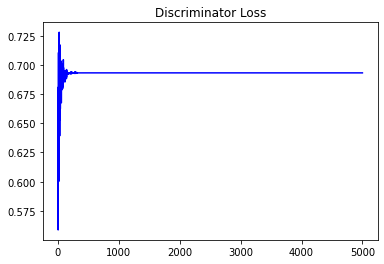

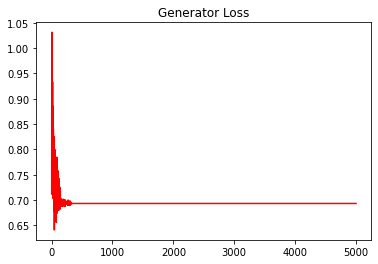

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

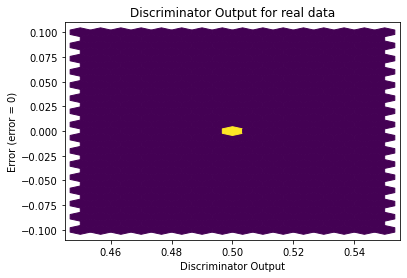

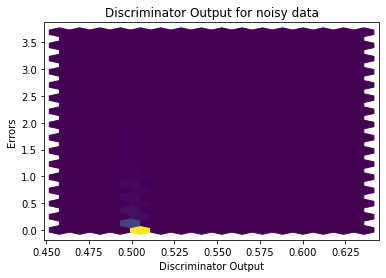

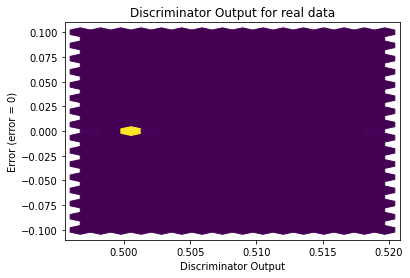

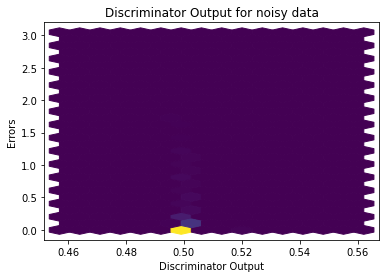

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


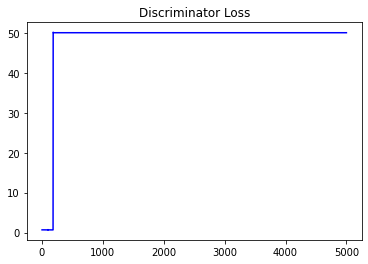

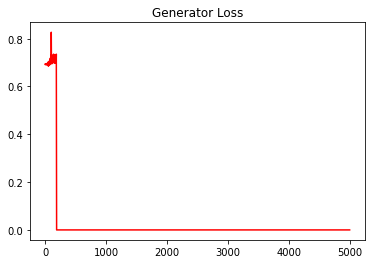

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

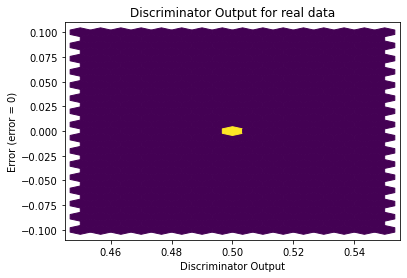

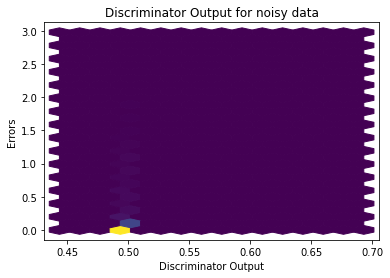

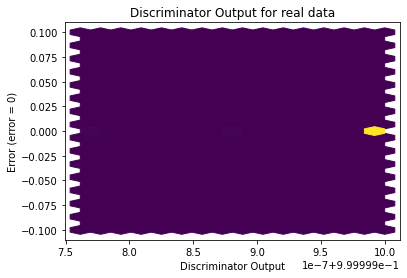

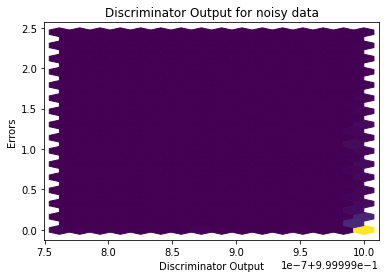

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1248]], device='cuda:0', requires_grad=True)
